### Wybrany algorytm data mining - Naiwny klasyfikator Bayesa

In [1]:
# Niezbędne biblioteki
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

#### 1. Przygotowanie zbioru danych i wybór zmiennych

In [49]:
df = pd.read_csv('data/bmd_prep.csv')

target_var = 'fracture'

numeric_predictors = df.select_dtypes(include=np.number).columns.tolist()
categorical_predictors =  df.select_dtypes(exclude=np.number).columns.tolist()
# # exclude less important predictors
numeric_predictors.remove('height_cm')
numeric_predictors.remove('waiting_time')
# exclude target variable from training set
categorical_predictors.remove(target_var)

fracture_labels = ['no fracture', 'fracture']

X = df[numeric_predictors + categorical_predictors]
y = df[target_var]

# Encode categorical data
X_encoded = pd.get_dummies(X)
y_encoded = y.replace(fracture_labels, [0, 1])

# Split data to training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.25, random_state=0)
X_train.head()

,age,weight_kg,bmd,sex_F,sex_M,medication_Anticonvulsant,medication_Glucocorticoids,medication_No medication
16,57.934593,67.0,0.7978,0,1,0,1,0
66,84.787394,68.0,1.2508,0,1,0,0,1
136,68.017748,58.0,0.6103,1,0,0,0,1
40,73.230427,52.0,0.7128,1,0,0,0,1
160,84.721764,52.0,0.7085,0,1,0,0,1


Dla wybranych wyżej zmiennych naiwny klasyfikator Bayesa osiągnął najmniejszą wartość błędu

#### 2. NaiveBayes - macierz klasyfikacji

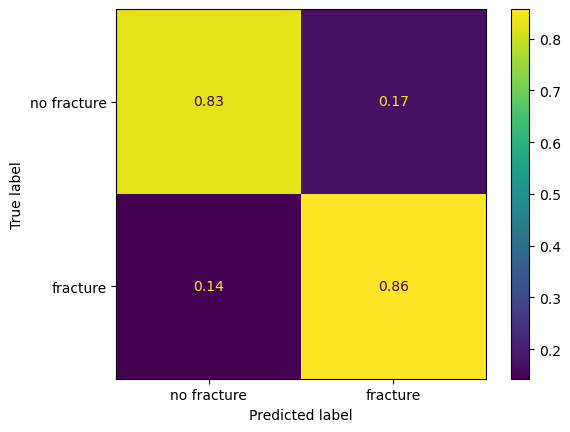

In [53]:
# fit data to NaiveBayes object
nb = GaussianNB() \
    .fit(X_train, y_train)

predictions = nb.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=nb.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=fracture_labels)
disp.plot()

In [54]:
print(
    'Accuracy on training data: ' 
    + str("{:.2%}".format(nb.score(X_train, y_train))))
print(
    'Accuracy on testing data: ' 
    + str("{:.2%}".format(nb.score(X_test, y_test))))

Accuracy on training data: 84.92%
Accuracy on testing data: 83.72%


#### 3. Interpretacja wyników

Naiwny klasyfikator Bayesa stanowi jeden z najprostszych algorytmów uczenia nadzorowanego. Jest na ogół szybki, dokładny i niezawodny. Cechują się wysoką dokładnością na dużych zbiorach danych. Jednak w tym przypadku do analizy wykorzystany zbiór danych nie jest duży, ale mimo to poradził sobie całkiem dobrze. <br>
Na zbiorze treningowym i testowym osiągnął błąd rzędzu `14-15%`. Jest to wynik gorszy niż uzyskany przy pomocy drzewa klasyfikacyjnego, ale również pozwolił na dość dobre przewidzenie wartości zmiennej zależnej (tutaj `fracture`) przy pomocy wybranych zmiennych objaśniających. <br><br>
Naiwny klasyfikator Bayesa również potwierdza słuszność hipotezy iż wiek, rodzaj leczenia i wskaźnik `bmd` (zmienne objaśniające użyte w modelu) wpływają na wystąpienie złamania.